<a href="https://colab.research.google.com/github/AbhishekRP2002/ML-AI-Notes-and-Self-Parctice/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research problem in ML that focuses on storing knwoledge gained while solving one problem and applying to a different but related problem. For eg. knowledge gained while solving to recognize cars can be used to apply while trying for recognizing trucks**

* Using a pretrained model and improving the accuracy 

In [1]:
pip install tensorflow_hub

In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
IMAGE_SHAPE +(3,)

(224, 224, 3)

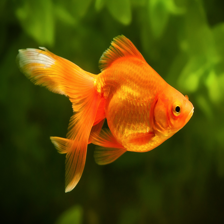

In [6]:
gold_fish = Image.open("/content/Goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish

array([[[0.14901961, 0.23137255, 0.00784314],
        [0.15294118, 0.23529412, 0.00784314],
        [0.15686275, 0.23921569, 0.00784314],
        ...,
        [0.08627451, 0.12941176, 0.00392157],
        [0.08235294, 0.1254902 , 0.00392157],
        [0.07843137, 0.12156863, 0.00784314]],

       [[0.14901961, 0.23137255, 0.00784314],
        [0.15686275, 0.23921569, 0.01176471],
        [0.15686275, 0.23921569, 0.00784314],
        ...,
        [0.08627451, 0.12941176, 0.00784314],
        [0.08235294, 0.1254902 , 0.00784314],
        [0.08235294, 0.1254902 , 0.00784314]],

       [[0.15686275, 0.23529412, 0.00392157],
        [0.15686275, 0.23921569, 0.00784314],
        [0.15686275, 0.23529412, 0.00784314],
        ...,
        [0.08627451, 0.13333333, 0.00392157],
        [0.08627451, 0.12941176, 0.00392157],
        [0.08235294, 0.1254902 , 0.01176471]],

       ...,

       [[0.02745098, 0.03921569, 0.00392157],
        [0.02745098, 0.03921569, 0.00392157],
        [0.02745098, 0

In [8]:
gold_fish.shape

(224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...]

array([[[[0.14901961, 0.23137255, 0.00784314],
         [0.15294118, 0.23529412, 0.00784314],
         [0.15686275, 0.23921569, 0.00784314],
         ...,
         [0.08627451, 0.12941176, 0.00392157],
         [0.08235294, 0.1254902 , 0.00392157],
         [0.07843137, 0.12156863, 0.00784314]],

        [[0.14901961, 0.23137255, 0.00784314],
         [0.15686275, 0.23921569, 0.01176471],
         [0.15686275, 0.23921569, 0.00784314],
         ...,
         [0.08627451, 0.12941176, 0.00784314],
         [0.08235294, 0.1254902 , 0.00784314],
         [0.08235294, 0.1254902 , 0.00784314]],

        [[0.15686275, 0.23529412, 0.00392157],
         [0.15686275, 0.23921569, 0.00784314],
         [0.15686275, 0.23529412, 0.00784314],
         ...,
         [0.08627451, 0.13333333, 0.00392157],
         [0.08627451, 0.12941176, 0.00392157],
         [0.08235294, 0.1254902 , 0.01176471]],

        ...,

        [[0.02745098, 0.03921569, 0.00392157],
         [0.02745098, 0.03921569, 0.00392157]

In [10]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [12]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

FileNotFoundError: ignored

### Load Flower datasets

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

AttributeError: ignored

In [14]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

NameError: ignored

Now take pre-trained model and retrain it using flowers images

In [16]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [17]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

NameError: ignored